# 基于keras的Fashion_MNIST数据集的神经网络(CNN)

## 目录

- [1. Fashion MNIST简介](#1.-Fashion-MNIST简介)
- [2. 加载Fashion MNIST数据集](#2.-加载Fashion-MNIST数据集)
- [3. 数据处理](#3.-数据处理)
- [4. 创建卷积神经网络](#4.-创建卷积神经网络)
- [5. 使用混淆矩阵来验证](#5.-使用混淆矩阵来验证)
- [6. 保存模型](#6.-保存模型)
- [7. 用自己的数据集来验证模型](#7.-用自己的数据集来验证模型)

**注**: 有关如何制作自己的图片数据集请参考我的另一篇文章: [如何用Paython制作自己的图片数据集](如何用Paython制作自己的图片数据集.ipynb)

# 1. Fashion MNIST简介

**FashionMNIST** 是一个替代 MNIST 手写数字集的图像数据集。 它是由 Zalando（一家德国的时尚科技公司）旗下的研究部门提供。其涵盖了来自 10 种类别的共 7 万个不同商品的正面图片。 
FashionMNIST 的大小、格式和训练集/测试集划分与原始的 MNIST 完全一致。60000/10000 的训练测试数据划分，28x28 的灰度图片。你可以直接用它来测试你的机器学习和深度学习算法性能，且不需要改动任何的代码。 
类别如下：

|标注编号|描述 |
| :---: | :---:|
|0	|T-shirt/top（T恤）|
|1	|Trouser（裤子）|
|2	|Pullover（套衫）|
|3	|Dress（裙子）|
|4	|Coat（外套）|
|5	|Sandal（凉鞋）|
|6	|Shirt（衬衫）|
|7	|Sneaker（运动鞋）|
|8	|Bag（包）|
|9	|Ankle boot（踝靴）|

数据集下载：https://github.com/zalandoresearch/fashion-mnist 

当然，我们也可以使用**keras** dataset中的 『fashion_mnist』来下载该数据集。

# 2. 加载Fashion MNIST数据集

In [24]:
from keras.datasets import fashion_mnist
import warnings
warnings.filterwarnings("ignore")

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
print x_train.shape
print y_train.shape
print x_test.shape
print y_test.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
import keras.backend as K
print K.image_data_format()

channels_last


In [4]:
from __future__ import unicode_literals
label_dict = {
    0: unicode('T恤'),
    1: unicode('裤子'),
    2: unicode('套衫'),
    3: unicode('裙子'),
    4: unicode('外套'),
    5: unicode('凉鞋'),
    6: unicode('衬衫'),
    7: unicode('运动鞋'),
    8: unicode('包'),
    9: unicode('踝靴')
}

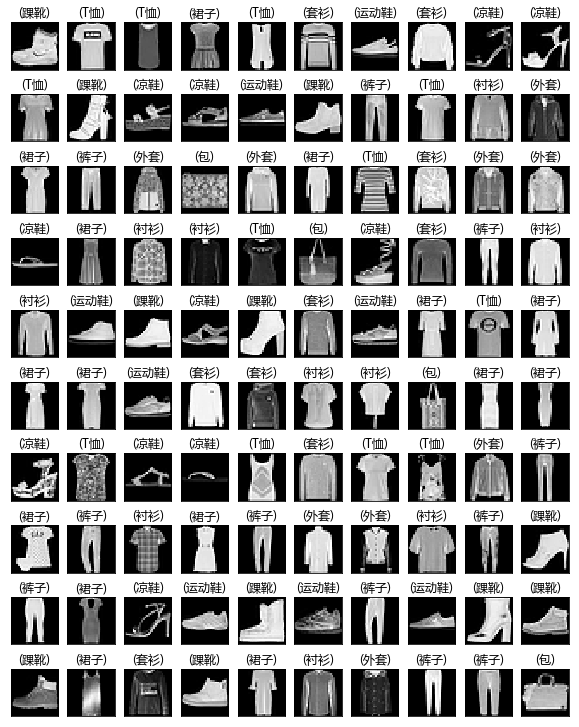

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10
total_line=10
plt.figure(figsize=(10,13))
for l in range(total_line):
    for i in xrange(l*n,n+l*n):
        ax = plt.subplot(total_line, n, i+1)
        plt.imshow(x_train[i], cmap='gray')
        cur_label = label_dict[y_train[i]]
        plt.title('(%s)' % cur_label)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
plt.show()    

# 3. 数据处理

In [32]:
print x_train.max()
print x_test.max()

255
255


将 "x_train" and "x_test" 归一化 (将值锁定在 [0,1]区间上)

In [25]:
X_train = x_train / 255.0
X_test = x_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')

In [8]:
print X_train.shape
print X_test.shape

(60000, 28, 28, 1)
(10000, 28, 28, 1)


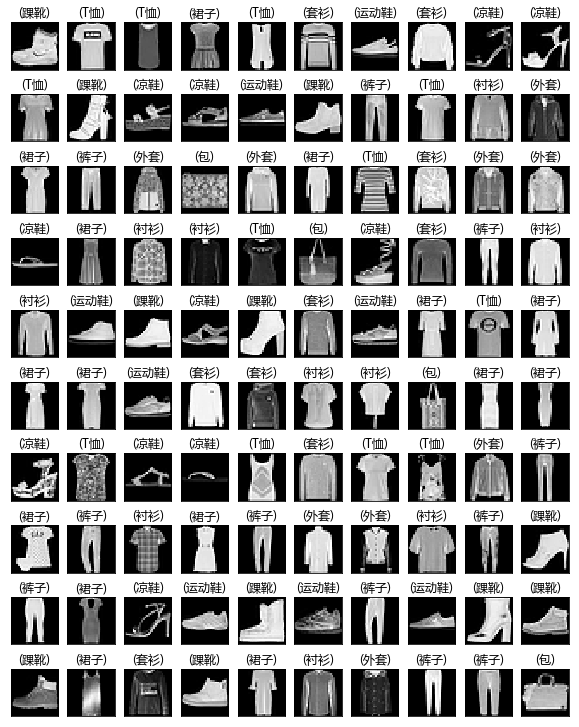

In [18]:
n = 10
total_line=10
plt.figure(figsize=(10,13))
for l in range(total_line):
    for i in xrange(l*n,n+l*n):
        ax = plt.subplot(total_line, n, i+1)
        plt.imshow(X_train[i,...,0], cmap='gray')
        cur_label = label_dict[y_train[i]]
        plt.title('(%s)' % cur_label)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
plt.show() 

# 4. 创建卷积神经网络

In [19]:
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adadelta
from keras.models import Sequential

input_shape=(28,28, 1)

# 一共有10个种类
num_classes = 10

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape, padding='same')) # 28 x 28 x 32
model.add(Conv2D(64, (3,3), activation='relu', padding='same')) # 28 x 28 x 64
model.add(MaxPool2D((2,2), padding='same')) # 14 x 14 x 64
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))



model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=Adadelta(), metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [23]:

epochs = 10
batch_size = 128

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print y_train.shape
print y_test.shape

pred_model = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))



(60000, 10)
(10000, 10)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.5553 - acc: 0.8054 - val_loss: 0.3876 - val_acc: 0.8559
Epoch 2/10
60000/60000 [==============================] - 105s 2ms/step - loss: 0.3560 - acc: 0.8735 - val_loss: 0.3095 - val_acc: 0.8848
Epoch 3/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.3071 - acc: 0.8909 - val_loss: 0.2713 - val_acc: 0.8995
Epoch 4/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.2711 - acc: 0.9035 - val_loss: 0.2536 - val_acc: 0.9069
Epoch 5/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.2497 - acc: 0.9096 - val_loss: 0.2490 - val_acc: 0.9069
Epoch 6/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.2276 - acc: 0.9183 - val_loss: 0.2374 - val_acc: 0.9139
Epoch 7/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.2153 - acc: 0.92

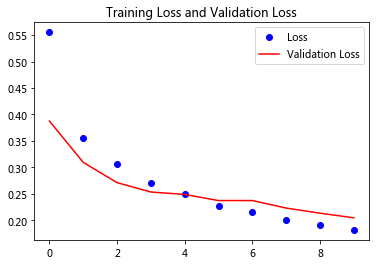

In [34]:
loss = pred_model.history['loss']
valdation_loss = pred_model.history['val_loss']
x = range(epochs)
plt.plot(x, loss, 'bo', color='blue', label='Loss')
plt.plot(x, valdation_loss, 'b', color='red', label='Validation Loss')
plt.title('Training Loss and Validation Loss')
plt.legend()
plt.show()


"Loss" and "Validation Loss" 在下降，说明模型是收敛的

In [40]:
scores = model.evaluate(X_test, y_test, verbose=0)
print scores
print 'Loss: %.3f %%' % scores[0]
print 'accuracy: %.3f %%' % scores[1]

[0.20489151276051998, 0.9255]
Loss: 0.205 %
accuracy: 0.925 %


In [67]:
import numpy as np
y_pred = model.predict(X_test)

y_test_classes = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

print y_pred_classes


[9 2 1 ... 8 1 5]


# 5. 使用混淆矩阵来验证

淆矩阵(Confusion Matrix)分析: https://blog.csdn.net/vesper305/article/details/44927047

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

print classification_report(y_test_classes, y_pred_classes, target_names=label_dict.values())

print confusion_matrix(y_test_classes, y_pred_classes)

             precision    recall  f1-score   support

         T恤       0.89      0.87      0.88      1000
         裤子       0.99      0.98      0.99      1000
         套衫       0.89      0.87      0.88      1000
         裙子       0.92      0.94      0.93      1000
         外套       0.86      0.91      0.88      1000
         凉鞋       0.99      0.99      0.99      1000
         衬衫       0.78      0.77      0.78      1000
        运动鞋       0.97      0.97      0.97      1000
          包       0.99      0.98      0.99      1000
         踝靴       0.98      0.97      0.97      1000

avg / total       0.93      0.93      0.93     10000

[[867   1  15  12   2   1  98   0   4   0]
 [  0 983   0  11   3   0   1   0   2   0]
 [ 14   1 871   7  54   0  53   0   0   0]
 [ 10   2  10 935  20   0  23   0   0   0]
 [  1   1  31  22 906   0  39   0   0   0]
 [  0   0   0   0   0 991   0   4   0   5]
 [ 83   0  52  26  63   0 771   0   5   0]
 [  0   0   0   0   0   7   0 974   0  19]
 [  2   1   1   3

从混淆矩阵来看 "裤子" 和 "包"的准确率非常高(达到了 99%), "衬衫"与"外套" 有些分不清(『衬衫』中有 63例都识别成了 『外套』)

# 6. 保存模型

In [48]:
model.save_weights('../data/fashion_mnist_model.h5')

# 7. 用自己的数据集来验证模型

有关如何制作自己的图片数据集请参考我的另一篇文章: [如何用Paython制作自己的图片数据集](如何用Paython制作自己的图片数据集.ipynb) 

因为我已经生成了自己的数据集，并保存到了"data/my-dataset-images/My_Fashion_MNIST" 文件中，因为以下代码可以直接加载这个数据集

In [120]:
my_fashion_test_data = np.load('../data/my-dataset-images/My_Fashion_MNIST')
print my_fashion_test_data.shape

(10, 28, 28)


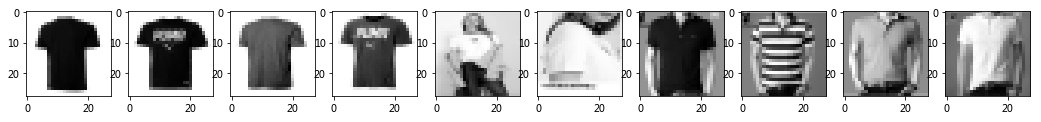

In [121]:
n = my_fashion_test_data.shape[0]

plt.figure(figsize=(18,10))
for i in range(n):
    plt.subplot(1,n,i+1)
    plt.imshow(my_fashion_test_data[i], cmap='gray')

plt.show()

In [155]:
print X_test.shape

# 将数据二值化
# 这一步非常重要，不然会影响模型的结果
my_fashion_test_data = my_fashion_test_data/255

# 因为 X_test 的shape是 (10000, 28, 28, 1)即: 10000 samples, 每个样本都是 28x28x1 的 (28 x 28 大小), 
# 只有1个通道(即灰度图像)
# 因此，我们自己的数据集也要按照这样的格式来reshape一下
my_X_test = my_fashion_test_data.reshape(-1, 28, 28, 1).astype(np.float32)

print my_X_test.shape
print my_X_test.max()
print my_X_test.min()

(10000, 28, 28, 1)
(10, 28, 28, 1)
2.1935036e-22
1.720395e-24


In [156]:
m_y_pred = model.predict(my_X_test)

In [157]:
#print m_y_pred
m_y_classes = np.argmax(m_y_pred, axis=1)
# print m_y_test_classes
print m_y_classes

[0 0 0 0 0 0 0 0 0 0]


测试结果还是非常满意的，准确率达到的100%，当然可能是因为我们自定义的测试数据集没有多少的原因，但whatever, 效果还是相当不错的！！

# 总结

本篇文章知识点还是比较多的, 数据处理，建立模型，创建CNN网络，构建自己的数据集用来测试等。

本模型的准确率不是很高，傻傻的不分"衬衫"与"外套"以及"T-Shirt", 可以试着多建立几层"隐藏层"或者将training data 加一些 "噪点"来训练等等方法来提高模型的准确度.